# **LAB 5 - PART 2 CNN**

In [42]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns


In [43]:
torch.manual_seed(841)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### **Data Preparation**
- **Create two images**: one for a square and another for a triangle.<br>
    Each image should be 4x4 pixels with values as shown below.<br>
    Then stack them in to tensor like `torch.tensor([<square tensor>,<triangle tensor>])`.

- **Create the label**: create the labels that correspond to each image. Use 1 for square and 0 for triangle.<br>

Then display the images as shown below.

![image.png](attachment:image.png)

In [44]:
# Define the size of the square image
image_size = 5

# Create a 2D array representing the square image
square = np.ones((image_size, image_size))

print("Square Image (2D Array):")
print(square)

Square Image (2D Array):
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [45]:
# Define the size of the triangle image
image_size = 5

# Create a 2D array representing the triangle image
triangle = np.zeros((image_size, image_size))

# Fill the upper triangle region with ones
for i in range(image_size):
    for j in range(i + 1):
        triangle[i, j] = 1

print("Triangle Image (2D Array):")
print(triangle)

Triangle Image (2D Array):
[[1. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1.]]


In [46]:
# ### START CODE HERE ###
# square_list = [[1., 1., 1., 1.],
#                [1., 5., 5., 1.],
#                [1., 5., 5., 1.],
#                [1., 1., 1., 1.]]
# square = np.array(square_list)


# triangle_list = [[1., 1., 1., 5.],
#                [1., 1., 5., 5.],
#                [1., 5., 5., 5.],
#                [5., 5., 5., 5.]]
# triangle = np.array(triangle_list)

# tensor_square = torch.tensor(square)
# tensor_triangle = torch.tensor(triangle)

# labels_square = torch.tensor([1])
# labels_triangle = torch.tensor([0])

# data_tensors = torch.stack([tensor_square,tensor_triangle])
# data_labels = torch.stack([labels_square,labels_triangle])

# ### END CODE HERE ###

In [47]:
import numpy as np
import torch

# Define the square and triangle lists
square_list = [[1., 1., 1., 1.],
               [1., 5., 5., 1.],
               [1., 5., 5., 1.],
               [1., 1., 1., 1.]]

triangle_list = [[1., 1., 1., 5.],
                 [1., 1., 5., 5.],
                 [1., 5., 5., 5.],
                 [5., 5., 5., 5.]]

# Convert lists to numpy arrays
square = np.array(square_list)
triangle = np.array(triangle_list)

# Convert numpy arrays to PyTorch tensors
tensor_square = torch.tensor(square).unsqueeze(0).unsqueeze(0)  # Add batch dimension
tensor_triangle = torch.tensor(triangle).unsqueeze(0).unsqueeze(0)  # Add batch dimension

# Define labels for the square and triangle images
label_square = torch.tensor([1])
label_triangle = torch.tensor([0])

# Stack tensors along the first dimension to create a batch
data_tensor = torch.cat([tensor_square, tensor_triangle], dim=0)

# Stack labels in a similar way to match the batched data
label_tensor = torch.stack([label_square, label_triangle])


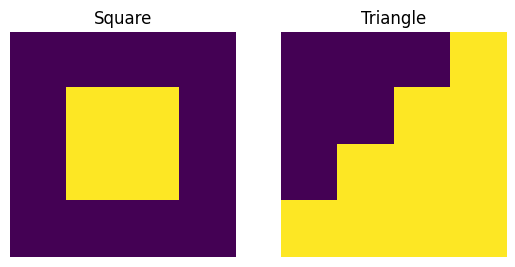

In [48]:

# Display square image
plt.subplot(1, 2, 1)
plt.imshow(square)
plt.title('Square')
plt.axis('off')

# Display triangle image
plt.subplot(1, 2, 2)
plt.imshow(triangle)
plt.title('Triangle')
plt.axis('off')

plt.show()

If your code is correct, this cell will execute without any issues.

In [49]:
assert data_tensor.shape == torch.Size([2, 1, 4, 4])
assert label_tensor.shape == torch.Size([2, 1])
print("You have successfully created the data_tensors!")

You have successfully created the data_tensors!


A `DataLoader` is a PyTorch utility that helps in loading and batching data for training or inference. <br>
It takes in a dataset as input and provides an iterable over the dataset, allowing you to access the data in batches.

In [50]:
dataset = torch.utils.data.TensorDataset(data_tensor, label_tensor)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=len(dataset), shuffle=True)

### **Define the SimpleCNN Architecture**

**Create simpleCNN model class using PyTorch.**
- Using `Conv2d()`,`ReLU()`,`Flatten()`,`Linear()`,`Sigmoid()`


![image.png](attachment:image.png)

In [51]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        ### START CODE HERE ###
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=2, out_channels=2, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(32,2)
        self.relu3 = nn.ReLU()
        self.out = nn.Linear(2,1)
        self.sigmoid = nn.Sigmoid()
        ### END CODE HERE ###

    def get_features(self, x):
        """
        Function to get the feature maps of the input
        """
        x = self.conv1(x)
        f1 = self.relu1(x)
        x = self.conv2(f1)
        f2 = self.relu2(x)
        return f1,f2

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.flatten(x)
        x = self.fc(x)
        x = self.relu3(x)
        x = self.out(x)
        x = self.sigmoid(x)
        return x

# Set the random seed for reproducible results
torch.manual_seed(841)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
print(model)

SimpleCNN(
  (conv1): Conv2d(1, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (conv2): Conv2d(2, 2, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Linear(in_features=32, out_features=2, bias=True)
  (relu3): ReLU()
  (out): Linear(in_features=2, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


If your model architechture is correct. this cell will execute without any issues.

In [52]:
tensor_triangle.shape

torch.Size([1, 1, 4, 4])

In [53]:
output_shape = model(tensor_triangle.float().to(device)).shape
output_shape

torch.Size([1, 1])

In [54]:
assert model(tensor_triangle.float().to(device)).shape == torch.Size([1, 1])
print("You have successfully implemented a forward pass!")

You have successfully implemented a forward pass!


### **Train the model for `n` Epochs.**<br>

After the training process you'll have to plot the model's loss for each epoch.
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

![image.png](attachment:image.png)


</details>

In [55]:
### START CODE HERE ###
epochs = 10000
lr = 0.001
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
loss_history = []
for epoch in range(epochs):
    for x,y in dataloader:
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        output = model(x.float())
        loss = criterion(output, y.float())
        loss.backward()
        optimizer.step()

        loss_history.append(loss.item())


    if (epoch+1) % 100 == 0:
        print(f'[Epoch {epoch+1}] Loss: {loss.item()}')
### END CODE HERE ###

[Epoch 100] Loss: 0.6887524724006653
[Epoch 200] Loss: 0.6849654912948608
[Epoch 300] Loss: 0.6804764270782471
[Epoch 400] Loss: 0.6738135814666748
[Epoch 500] Loss: 0.6658682823181152
[Epoch 600] Loss: 0.6571264266967773
[Epoch 700] Loss: 0.6465257406234741
[Epoch 800] Loss: 0.6337717175483704
[Epoch 900] Loss: 0.617363452911377
[Epoch 1000] Loss: 0.5968653559684753
[Epoch 1100] Loss: 0.571781575679779
[Epoch 1200] Loss: 0.5429844856262207
[Epoch 1300] Loss: 0.5107478499412537
[Epoch 1400] Loss: 0.47731101512908936
[Epoch 1500] Loss: 0.4455109238624573
[Epoch 1600] Loss: 0.4172670245170593
[Epoch 1700] Loss: 0.3931182026863098
[Epoch 1800] Loss: 0.37361249327659607
[Epoch 1900] Loss: 0.3567778468132019
[Epoch 2000] Loss: 0.3428036570549011
[Epoch 2100] Loss: 0.33070802688598633
[Epoch 2200] Loss: 0.3189103603363037
[Epoch 2300] Loss: 0.3078440725803375
[Epoch 2400] Loss: 0.29606178402900696
[Epoch 2500] Loss: 0.2825261354446411
[Epoch 2600] Loss: 0.2666209042072296
[Epoch 2700] Loss: 

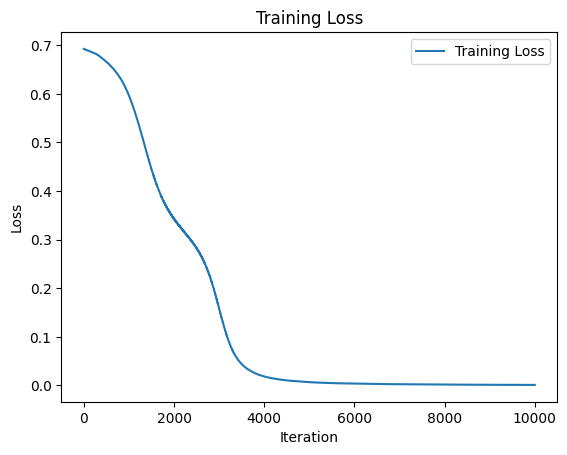

In [56]:
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

**Print model's weight**

- Using `.state_dict()`

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

```
OrderedDict([('conv1.weight',
              tensor([...], device='cuda:0')),
             ('conv1.bias', tensor([...], device='cuda:0')),
             ('conv2.weight',
              ...
             ('out.weight', tensor([...], device='cuda:0')),
             ('out.bias', tensor([...], device='cuda:0'))])
```

</details>

In [57]:
### START CODE HERE ###
model.state_dict()
### END CODE HERE ###

OrderedDict([('conv1.weight',
              tensor([[[[ 0.4067,  0.3885,  0.0350],
                        [ 0.1886, -0.2966, -0.3441],
                        [ 0.0218, -0.1420, -0.0328]]],
              
              
                      [[[-0.1634,  0.0051,  0.2133],
                        [ 0.3012,  0.4258,  0.2038],
                        [-0.1495,  0.4598,  0.5247]]]])),
             ('conv1.bias', tensor([-0.1167,  0.1044])),
             ('conv2.weight',
              tensor([[[[ 0.1382,  0.0599, -0.3067],
                        [-0.1226, -0.0461, -0.3297],
                        [-0.1627, -0.1836, -0.0983]],
              
                       [[-0.0271,  0.2784,  0.2995],
                        [ 0.2462,  0.4819,  0.3733],
                        [-0.0148,  0.1654,  0.2258]]],
              
              
                      [[[-0.0155, -0.0861, -0.0033],
                        [-0.0911,  0.0210,  0.1185],
                        [-0.2459,  0.2029,  0.2227]],
  

**Show feature maps of each model's filters with 2 classes of inputs.**

- Use `.get_features()`
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

![image.png](attachment:image.png)

</details>

In [58]:
triangle_float = tensor_triangle.float()
triangle_float.shape

torch.Size([1, 1, 4, 4])

In [75]:
### START CODE HERE ###

conv1_triangle, conv2_triangle = model.get_features(tensor_triangle.float().to(device))
conv1_square, conv2_square = model.get_features(tensor_square.float().to(device))



### END CODE HERE ###

In [76]:
conv1_triangle.shape

torch.Size([1, 2, 4, 4])

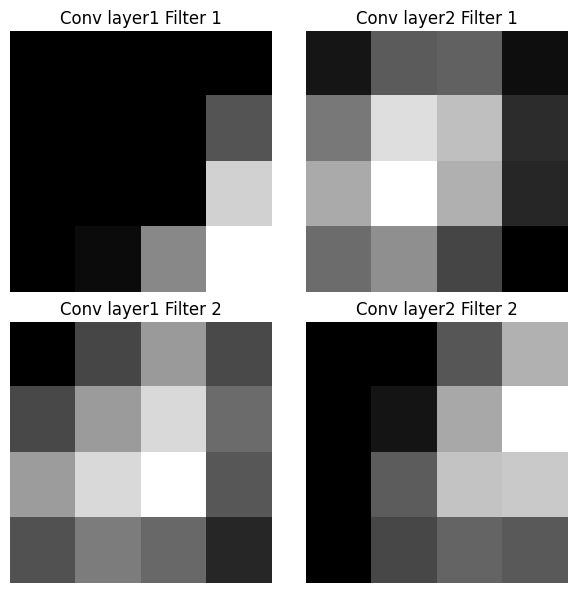

In [60]:

plt.figure(figsize=(12,6))

feature_maps = [conv1_triangle,conv2_triangle,conv1_square,conv2_square]
titles = ["Conv layer1","Conv layer2"]

for i, (feature_map, title) in enumerate(zip(feature_maps, titles), 1):
    plt.subplot(2, 4, i)
    plt.imshow(feature_map[0, 0].squeeze().cpu().detach().numpy(), cmap="gray")
    plt.title(title + " Filter 1")
    plt.axis('off')

    plt.subplot(2, 4, i + 4)
    plt.imshow(feature_map[0, 1].squeeze().cpu().detach().numpy(), cmap="gray")
    plt.title(title + " Filter 2")
    plt.axis('off')

plt.tight_layout()
plt.show()

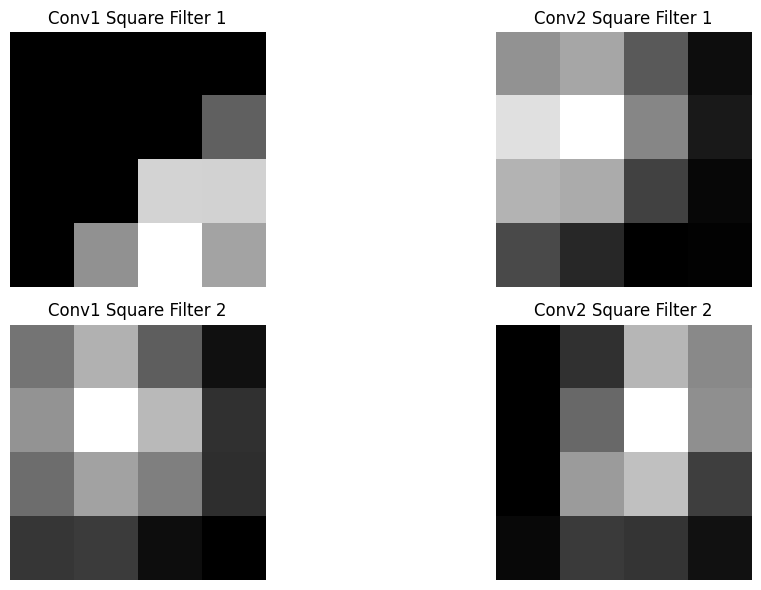

In [61]:
import matplotlib.pyplot as plt

# Get feature maps for square inputs
conv1_square, conv2_square = model.get_features(tensor_square.float().to(device))

# Plotting feature maps for square inputs
plt.figure(figsize=(12, 6))

# List of feature maps and their titles for square inputs
feature_maps_square = [conv1_square, conv2_square]
titles_square = ["Conv1 Square", "Conv2 Square"]

# Loop through feature maps and titles to plot them
for i, (feature_map, title) in enumerate(zip(feature_maps_square, titles_square), 1):
    plt.subplot(2, 2, i)
    plt.imshow(feature_map[0, 0].squeeze().cpu().detach().numpy(), cmap="gray")
    plt.title(title + " Filter 1")
    plt.axis('off')

    plt.subplot(2, 2, i + 2)
    plt.imshow(feature_map[0, 1].squeeze().cpu().detach().numpy(), cmap="gray")
    plt.title(title + " Filter 2")
    plt.axis('off')

plt.tight_layout()
plt.show()


### **Evaluate how the model generalize.**

- **Create two images**: one for a square and another for a triangle.<br>
    Each image should be 4x4 pixels with values as shown below.<br>
    Then stack them in to tensor like `torch.tensor([<square tensor>,<triangle tensor>])`.

- **Create the label**: create the labels that correspond to each image. Use 1 for square and 0 for triangle.<br>

Then display the images as shown below.

![image.png](attachment:image.png)

In [90]:
import numpy as np
import torch

# Define the square and triangle lists
square_list = [[1., 1., 1., 1.],
                            [1., 2., 2., 1.],
                            [1., 2., 2., 1.],
                            [1., 1., 1., 1.]]

triangle_list = [[1., 1., 1., 2.],
                              [1., 1., 2., 2.],
                              [1., 2., 2., 2.],
                              [2., 2., 2., 2.]]

# Convert lists to numpy arrays
square_test = np.array(square_list)
triangle_test = np.array(triangle_list)

# Convert numpy arrays to PyTorch tensors
tensor_square_test = torch.tensor(square_test).unsqueeze(0).unsqueeze(0)  # Add batch dimension
tensor_triangle_test = torch.tensor(triangle_test).unsqueeze(0).unsqueeze(0)  # Add batch dimension

# Define labels for the square and triangle images
labels_square_test = torch.tensor([1])
labels_triangle_test = torch.tensor([0])

# Stack tensors along the first dimension to create a batch
test_data_tensors = torch.cat([tensor_square_test, tensor_triangle_test], dim=0)

# Stack labels in a similar way to match the batched data
test_data_labels = torch.stack([label_square, label_triangle])


In [97]:
test_data_labels

tensor([[1],
        [0]])

In [82]:

# # Create square test tensor
# square_test = torch.tensor([[1., 1., 1., 1.],
#                             [1., 2., 2., 1.],
#                             [1., 2., 2., 1.],
#                             [1., 1., 1., 1.]])

# # Create triangle test tensor
# triangle_test = torch.tensor([[1., 1., 1., 2.],
#                               [1., 1., 2., 2.],
#                               [1., 2., 2., 2.],
#                               [2., 2., 2., 2.]])

# # Stack square and triangle test tensors into a single tensor
# tensor_square_test = square_test.unsqueeze(0).unsqueeze(0)  # Add batch dimension
# tensor_triangle_test = triangle_test.unsqueeze(0).unsqueeze(0)  # Add batch dimension
# test_data_tensors = torch.cat([tensor_square_test, tensor_triangle_test], dim=0)

# # Create test labels (1 for square, 0 for triangle)
# labels_square_test = torch.tensor([1])
# labels_triangle_test = torch.tensor([0])
# test_data_labels = torch.stack([labels_square_test, labels_triangle_test])

# test_data_tensors = test_data_tensors.unsqueeze(1)
# print("Test Data Tensors Shape:", test_data_tensors.shape)
# print("Test Labels Shape:", test_data_labels.shape)


Test Data Tensors Shape: torch.Size([2, 1, 1, 4, 4])
Test Labels Shape: torch.Size([2, 1])


In [91]:
test_data_tensors

tensor([[[[1., 1., 1., 1.],
          [1., 2., 2., 1.],
          [1., 2., 2., 1.],
          [1., 1., 1., 1.]]],


        [[[1., 1., 1., 2.],
          [1., 1., 2., 2.],
          [1., 2., 2., 2.],
          [2., 2., 2., 2.]]]], dtype=torch.float64)

If your code is correct, this cell will execute without any issues.

In [85]:
assert test_data_tensors.shape == torch.Size([2, 1, 4, 4])
assert test_data_labels.shape == torch.Size([2, 1])
print("You have successfully created the data_tensors!")

You have successfully created the data_tensors!


**Show feature maps of each model's filters with 2 classes of test data.**

- Use `.get_features()`

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical.

![image-2.png](attachment:image-2.png)

</details>

In [92]:
# Get feature maps for triangle and square test tensors
conv1_triangle, conv2_triangle = model.get_features(tensor_triangle_test.float().to(device))
conv1_square, conv2_square = model.get_features(tensor_square_test.float().to(device))

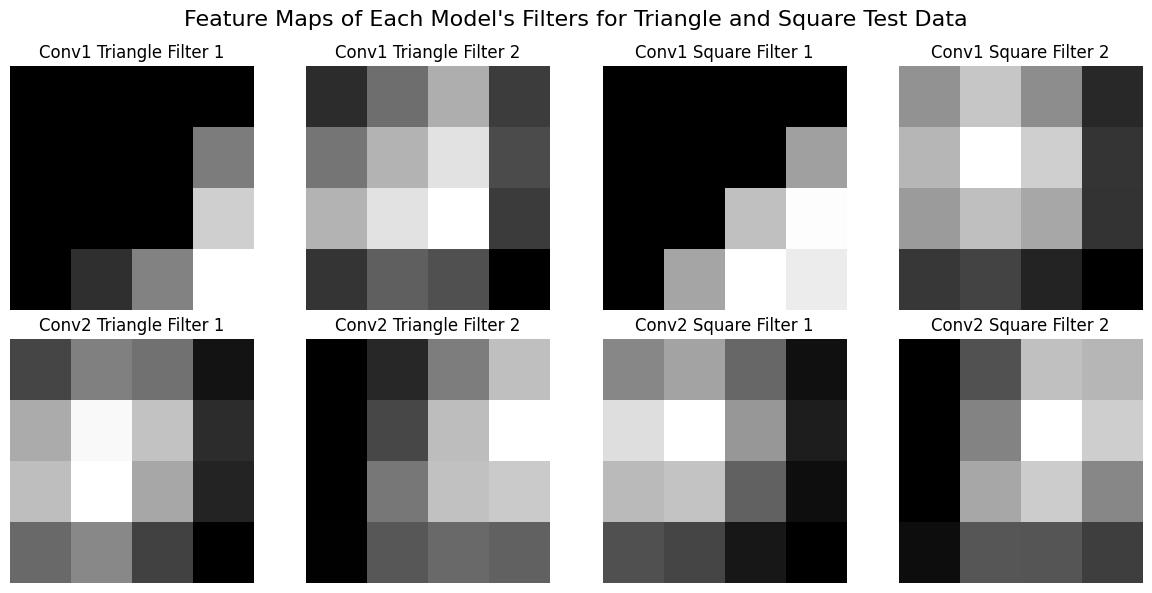

In [93]:
import matplotlib.pyplot as plt

# Plotting feature maps for triangle inputs
plt.figure(figsize=(12, 6))
plt.suptitle('Feature Maps of Each Model\'s Filters for Triangle and Square Test Data', fontsize=16)

# Plot feature maps for triangle test tensor
plt.subplot(2, 4, 1)
plt.imshow(conv1_triangle[0, 0].squeeze().cpu().detach().numpy(), cmap="gray")
plt.title('Conv1 Triangle Filter 1')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(conv1_triangle[0, 1].squeeze().cpu().detach().numpy(), cmap="gray")
plt.title('Conv1 Triangle Filter 2')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(conv2_triangle[0, 0].squeeze().cpu().detach().numpy(), cmap="gray")
plt.title('Conv2 Triangle Filter 1')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(conv2_triangle[0, 1].squeeze().cpu().detach().numpy(), cmap="gray")
plt.title('Conv2 Triangle Filter 2')
plt.axis('off')

# Plot feature maps for square test tensor
plt.subplot(2, 4, 3)
plt.imshow(conv1_square[0, 0].squeeze().cpu().detach().numpy(), cmap="gray")
plt.title('Conv1 Square Filter 1')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(conv1_square[0, 1].squeeze().cpu().detach().numpy(), cmap="gray")
plt.title('Conv1 Square Filter 2')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(conv2_square[0, 0].squeeze().cpu().detach().numpy(), cmap="gray")
plt.title('Conv2 Square Filter 1')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(conv2_square[0, 1].squeeze().cpu().detach().numpy(), cmap="gray")
plt.title('Conv2 Square Filter 2')
plt.axis('off')

plt.tight_layout()
plt.show()


**Try to predict classes using the test dataset. Then, plot the confusion matrix and print the classification report.**
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

![image.png](attachment:image.png)

```
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

```

</details>

In [95]:
test_data_tensors

tensor([[[[1., 1., 1., 1.],
          [1., 2., 2., 1.],
          [1., 2., 2., 1.],
          [1., 1., 1., 1.]]],


        [[[1., 1., 1., 2.],
          [1., 1., 2., 2.],
          [1., 2., 2., 2.],
          [2., 2., 2., 2.]]]], dtype=torch.float64)

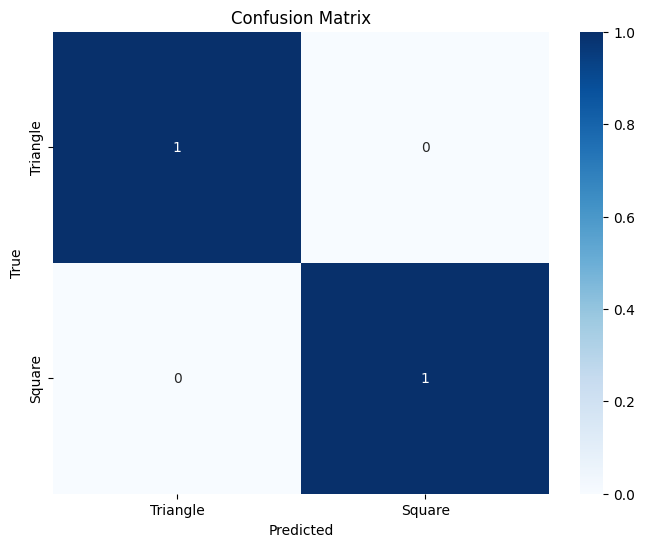

              precision    recall  f1-score   support

    Triangle       1.00      1.00      1.00         1
      Square       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [110]:
# Predict classes using the test dataset
with torch.no_grad():
    model.eval()  # Set model to evaluation mode
    predictions = model(test_data_tensors.float().to(device)).cpu().numpy().round()  # Round predictions to 0 or 1

# Convert predicted labels and true labels to numpy arrays
predicted_labels = predictions.astype(int).flatten()
true_labels = test_data_labels.cpu().numpy().flatten()

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Triangle", "Square"], yticklabels=["Triangle", "Square"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print(classification_report(true_labels, predicted_labels, target_names=["Triangle", "Square"]))
